In [1]:
import pandas as pd
import sqlite3
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
conn=sqlite3.connect("/kaggle/input/trendyol-product-comments/TrendyolProduct.sqlite3")
c=conn.cursor()

In [3]:
c.execute("SELECT * FROM TBL_Product")
urunler=c.fetchall()
df_product=pd.DataFrame(urunler)
df_product.columns=["urun_id","urun","marka","url"]
df_product.head(3)

,urun_id,urun,marka,url
0,1,Erkek %100 Pamuk Koyu Vizon Polo Yaka Düz T-sh...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...
1,2,Erkek %100 Pamuk Beyaz Polo Yaka Düz T-shirt E...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...
2,3,Erkek %100 Pamuk Açık Turuncu Polo Yaka Düz T-...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...


In [4]:
c.execute("SELECT * FROM TBL_Comment")
yorumlar=c.fetchall()
df_comment=pd.DataFrame(yorumlar)
df_comment.columns=["yorum_id","urun_id","yorumlar","puan"]
df_comment.head(3)

,yorum_id,urun_id,yorumlar,puan
0,1,1,Babam için almıştım aşırııı güzell,5
1,2,1,Dokusu çok güzel kalitesi çok iyi,5
2,3,1,renk ve kalite çok güzel AVVA sonuçta indirimd...,5


In [5]:
markalar=df_product["marka"].value_counts()

In [6]:
markalar

Koton           1347
Defacto          875
Mavi             846
US Polo Assn     334
Suwen            214
Avva             191
HUMMEL            73
Nike              55
Colin’s           47
Puma              41
adidas            27
Tudors            21
LC Waikiki        11
Loft              11
Derimod           10
                   6
Name: marka, dtype: int64

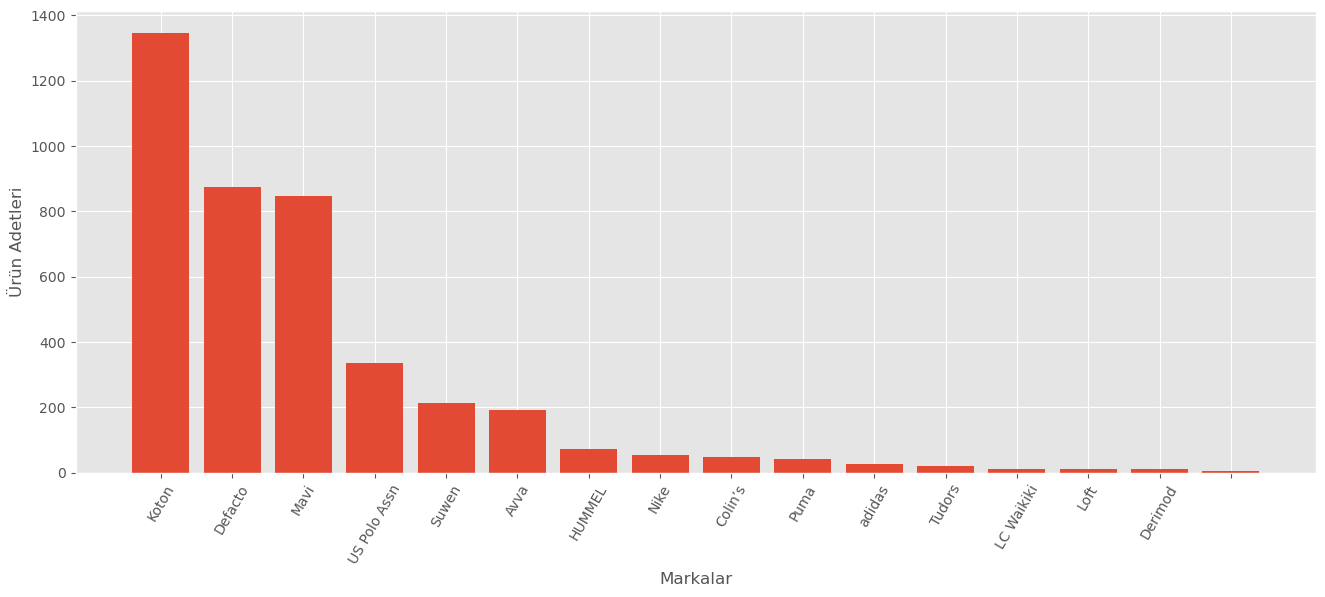

In [7]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(markalar.index,markalar.values)
plt.xlabel("Markalar")
plt.ylabel("Ürün Adetleri")
plt.xticks(rotation=60)
plt.show()

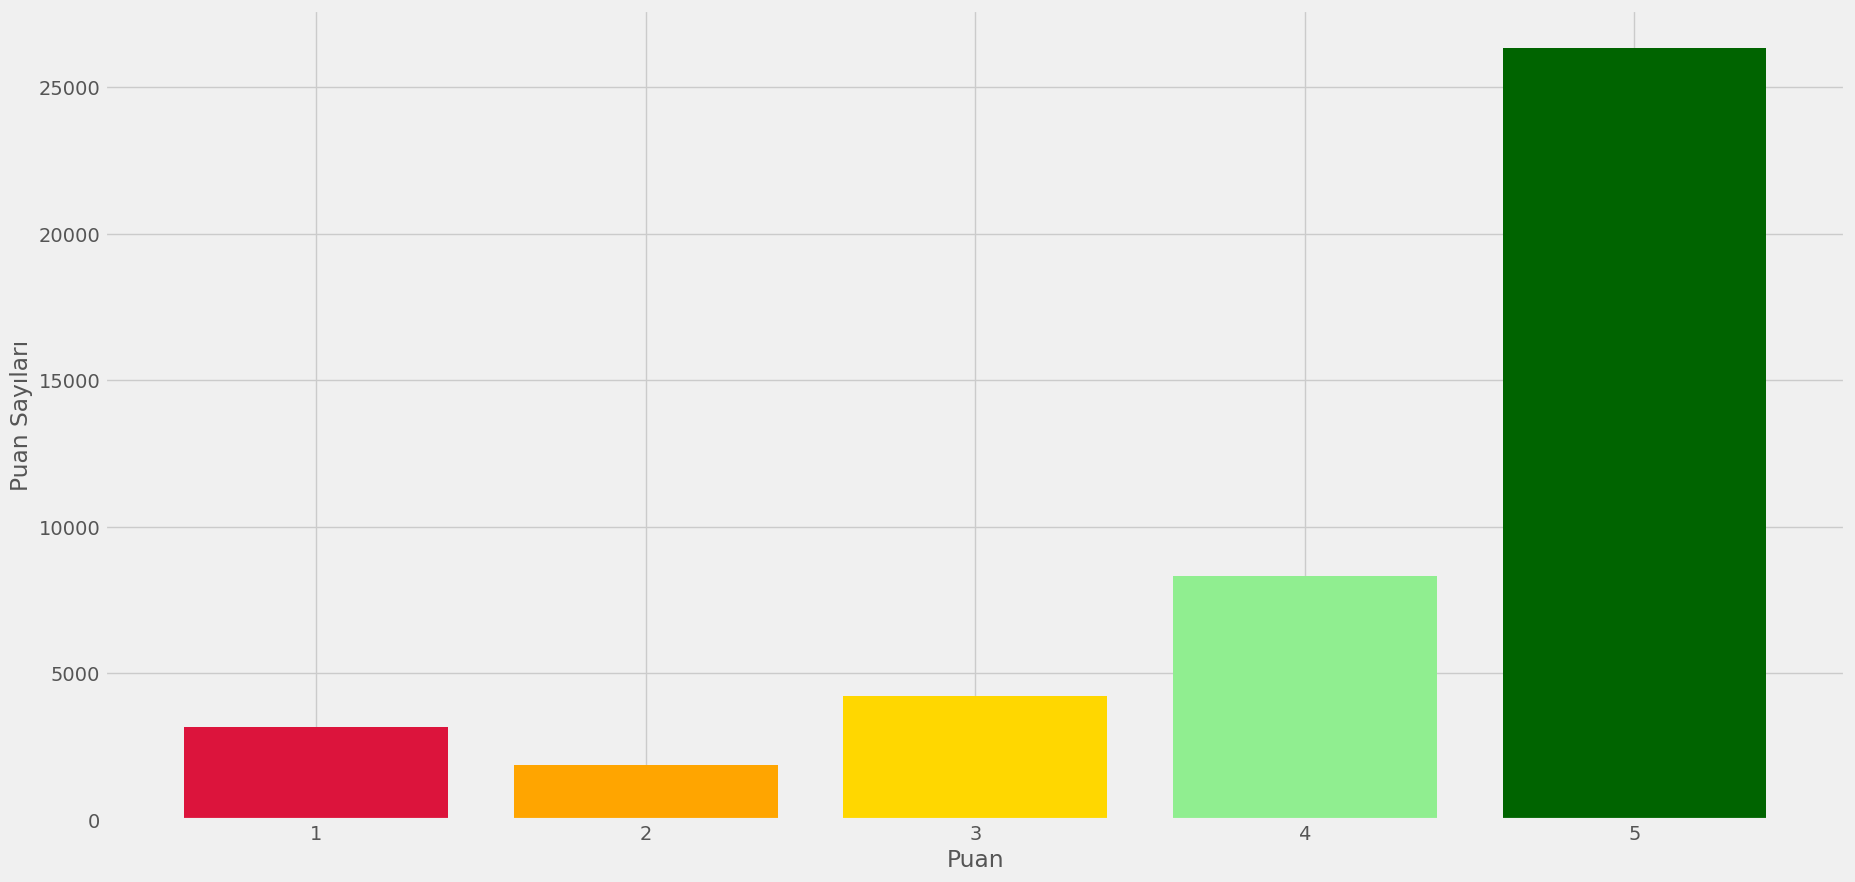

In [8]:
puan_count=df_comment["puan"].value_counts()

puan_count=puan_count.sort_index()

plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,10))
plt.xlabel("Puan")
plt.ylabel("Puan Sayıları")
plt.bar(puan_count.index,puan_count.values,color=["crimson","orange","gold","lightgreen","darkgreen"])
plt.show()

In [9]:
puan_count

1     3175
2     1863
3     4231
4     8315
5    26339
Name: puan, dtype: int64

In [10]:
#ürün isimlerinin markalara göre ort karakter sayısı

In [11]:
df_product.head(3)

,urun_id,urun,marka,url
0,1,Erkek %100 Pamuk Koyu Vizon Polo Yaka Düz T-sh...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...
1,2,Erkek %100 Pamuk Beyaz Polo Yaka Düz T-shirt E...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...
2,3,Erkek %100 Pamuk Açık Turuncu Polo Yaka Düz T-...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...


In [12]:
df_product["urun"].apply(len)

0       57
1       52
2       59
3       55
4       56
        ..
4104    38
4105    40
4106    33
4107    64
4108    61
Name: urun, Length: 4109, dtype: int64

In [13]:
df_product["len"]=df_product["urun"].apply(len)

In [14]:
df_product.head(3)

,urun_id,urun,marka,url,len
0,1,Erkek %100 Pamuk Koyu Vizon Polo Yaka Düz T-sh...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...,57
1,2,Erkek %100 Pamuk Beyaz Polo Yaka Düz T-shirt E...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...,52
2,3,Erkek %100 Pamuk Açık Turuncu Polo Yaka Düz T-...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...,59


In [15]:
df_product.groupby("marka").mean()

/tmp/ipykernel_20/4192981014.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_product.groupby("marka").mean()


,urun_id,len
marka,,
,1130.500000,0.000000
Avva,1180.910995,60.596859
Colin’s,2877.361702,70.553191
Defacto,1889.563429,58.074286
Derimod,2608.800000,40.500000
HUMMEL,2079.904110,40.041096
Koton,2613.026726,41.317743
LC Waikiki,1616.000000,54.818182
Loft,2669.727273,34.545455


In [16]:
karakter=df_product.groupby("marka").mean()

/tmp/ipykernel_20/2323638319.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  karakter=df_product.groupby("marka").mean()


/tmp/ipykernel_20/4105375212.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


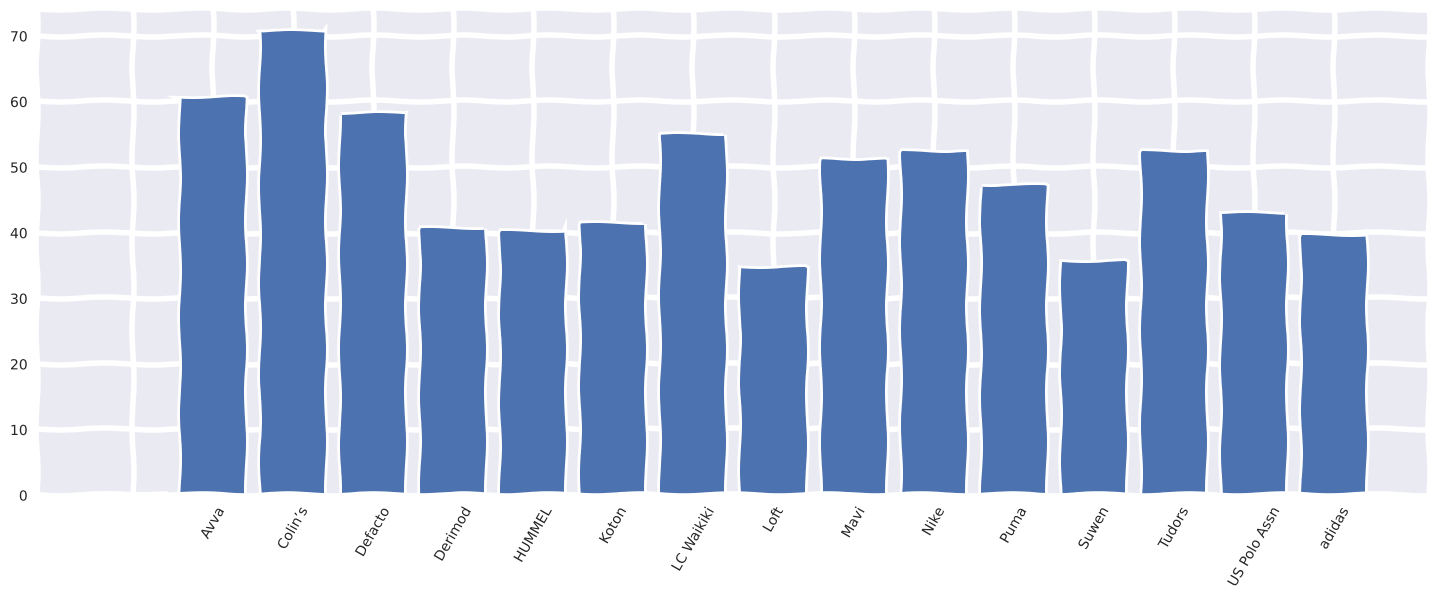

In [17]:
with plt.xkcd():
    plt.style.use("seaborn")
    plt.figure(figsize=(16,6))
    plt.bar(karakter.index,karakter["len"])
    plt.xticks(rotation=60)
    plt.show()




In [18]:
df_product.head(3)

,urun_id,urun,marka,url,len
0,1,Erkek %100 Pamuk Koyu Vizon Polo Yaka Düz T-sh...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...,57
1,2,Erkek %100 Pamuk Beyaz Polo Yaka Düz T-shirt E...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...,52
2,3,Erkek %100 Pamuk Açık Turuncu Polo Yaka Düz T-...,Avva,https://www.trendyol.com/avva/erkek-100-pamuk-...,59


In [19]:
df_comment.head(3)

,yorum_id,urun_id,yorumlar,puan
0,1,1,Babam için almıştım aşırııı güzell,5
1,2,1,Dokusu çok güzel kalitesi çok iyi,5
2,3,1,renk ve kalite çok güzel AVVA sonuçta indirimd...,5


In [20]:
#birleştirme

In [21]:
df_comment.merge(df_product[["urun_id","marka"]],left_on="urun_id",right_on="urun_id")

,yorum_id,urun_id,yorumlar,puan,marka
0,1,1,Babam için almıştım aşırııı güzell,5,Avva
1,2,1,Dokusu çok güzel kalitesi çok iyi,5,Avva
2,3,1,renk ve kalite çok güzel AVVA sonuçta indirimd...,5,Avva
3,4,1,Çok beğendim güzel,5,Avva
4,5,1,Güzel tişört,5,Avva
...,...,...,...,...,...
43918,43919,4107,Fotografa bakınca dışarda giyilecek gibi duruy...,3,Koton
43919,43920,4108,biraz kalın batan bir mali var 38 40 giyiyorum...,3,Defacto
43920,43921,4109,ürünü aldiktan 20 gün sonra fiyat yarı yarıya ...,1,Mavi
43921,43922,4109,Yakası çok büyük ve kumaşı maviye yakışmadı iade,1,Mavi


In [22]:
marka_puan=df_comment.merge(df_product[["urun_id","marka"]],left_on="urun_id",right_on="urun_id")

In [23]:
mpg=marka_puan.groupby("marka").mean()
mpg=mpg.sort_values(by="puan")

/tmp/ipykernel_20/2221355079.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpg=marka_puan.groupby("marka").mean()


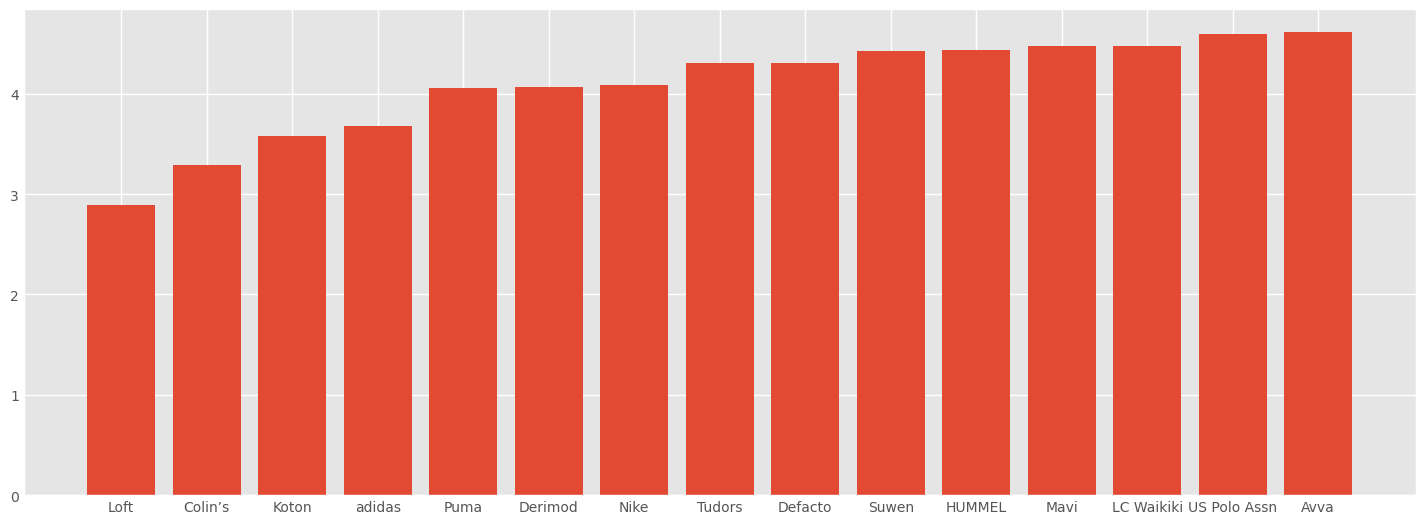

In [24]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(mpg.index,mpg["puan"])
plt.show()


In [25]:
df_comment.head(3)

,yorum_id,urun_id,yorumlar,puan
0,1,1,Babam için almıştım aşırııı güzell,5
1,2,1,Dokusu çok güzel kalitesi çok iyi,5
2,3,1,renk ve kalite çok güzel AVVA sonuçta indirimd...,5


In [26]:
df_comment["yorum"]=df_comment["urun_id"].astype("str")+" "+df_comment["yorumlar"]

In [27]:
df=df_comment[["yorumlar","puan"]]

In [28]:
df.head(3)

,yorumlar,puan
0,Babam için almıştım aşırııı güzell,5
1,Dokusu çok güzel kalitesi çok iyi,5
2,renk ve kalite çok güzel AVVA sonuçta indirimd...,5


In [29]:
t=pd.DataFrame()
t["yorumlar"]=["1 Kargo geldi çok güzeldi.Yanında kesme şeker göndermişler"]
t["puan"]=5

In [30]:
df=pd.concat([df,t],ignore_index=True)

In [31]:
df.tail(3)

,yorumlar,puan
43921,Yakası çok büyük ve kumaşı maviye yakışmadı iade,1
43922,Etiketde yazan fiyat daha uygun ?,1
43923,1 Kargo geldi çok güzeldi.Yanında kesme şeker ...,5


In [32]:
#5-4 pozitif , 3 nötr , 1-2 negatif 
import numpy as np

In [33]:
df["puan"]=df["puan"].astype("str")
df["puan"]=np.where(df["puan"]=="1","negatif",df["puan"])
df["puan"]=np.where(df["puan"]=="2","negatif",df["puan"])
df["puan"]=np.where(df["puan"]=="3","notr",df["puan"])
df["puan"]=np.where(df["puan"]=="4","pozitif",df["puan"])
df["puan"]=np.where(df["puan"]=="5","pozitif",df["puan"])

In [34]:
df["puan"].value_counts()

pozitif    34655
negatif     5038
notr        4231
Name: puan, dtype: int64

In [35]:
df.head(3)

,yorumlar,puan
0,Babam için almıştım aşırııı güzell,pozitif
1,Dokusu çok güzel kalitesi çok iyi,pozitif
2,renk ve kalite çok güzel AVVA sonuçta indirimd...,pozitif


In [36]:
df["yorumlar"]=df["yorumlar"].str.lower()

In [37]:
import string

In [38]:
for i in string.punctuation:
    df["yorumlar"]=df["yorumlar"].str.replace(i," ")
    df["yorumlar"]=df["yorumlar"].str.replace("  ","")

/tmp/ipykernel_20/970050429.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["yorumlar"]=df["yorumlar"].str.replace(i," ")


In [39]:
stopwords=['fakat','lakin','ancak','acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']

In [40]:
for s in stopwords:
    s=" "+s+" "
    df["yorumlar"]=df["yorumlar"].str.replace(s," ")

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vec=CountVectorizer(max_features=400)
x=vec.fit_transform(df["yorumlar"]).toarray()

In [43]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
y=df["puan"]

In [45]:
tahmin=x[-1]

In [46]:
x=x[0:-1]
y=y.iloc[0:-1]


In [47]:
rf=RandomForestClassifier()
model=rf.fit(x,y)
model.score(x,y)

0.9655533547344216

In [48]:
model.predict([tahmin])

array(['pozitif'], dtype=object)